# Object Detection 기법

## Selective Search(SS)
* 빠른 Detecion과 높은 Recall 예측 성능을 동시에 만족하는 알고리즘

## 주요 용어 정리
* Ground-Truth box
    - Ground-Truth : 모델이 실제 예측하기 원하는 값(정답)

* Anchor Box ?

* IoU
    - 모델이 예측한 결과와 Ground Truth box가 얼마나 정확하게 겹치는가를 나타내는 수치
    - $IoU = {Box가 서로 겹치는 영역 \over 전체 Box의 합집합 영역}$
    - IoU 값이 1에 가까울수록 정답, 0이면 전혀 같지 않음

* NMS(Non Max Suppression
    - 가장 확실한 Bounding Box를 제외하고 나머지 Bounding Box를 제거해주는 기능
    - Max 값을 제외하고 나머지 값들을 Suppresion 해주는 기능
    - __'Confidence Threshold(기준 신뢰도)'__ 값 이하의 IoU 값을 갖는 Boundig Box를 제거함
    - 참고 : Computer_Vision_and_NN.pdf
* Confidence Threshold(기준 신뢰도)
    - 값의 변화에 따라 정밀도-재현율은 변화한다.
        + 값이 낮을수록 : 정밀도는 낮아지고 재현율은 높아짐
        + 값이 높은면 : 정밀도는 놓아지고 재현율은 낮아짐

* mAP(mean Average Precision)
    - Object detction에서 모델의 성능(정확도)을 측정하는 지표
    - 재현율(Recall)과 정밀도(Presion)의 값을 평균화한 성능 수치
    - mAP가 높을수록 정확하고, 작을수록 부정확

* Confusion Matrix(오차행렬)
    - 참고 : 15 Hands-On_ML.md
    - 참고 :  핸즈온 머신러닝_3장.ipynb
    
## Object Detection의 목표
* 서로 다른 크기의 Object를 Detect
* Detection 시간의 최소화
* Image 상에서 필요한 Object 추출
    - 이미지에서 '배경'과 필요한 Object의 경계가 모호함
* Data Set의 부족
    - 훈련 가능한 데이터 Set을 수집하기 어려움
    - 저작권, 개인정보 등의 이유로

In [ ]:
!pip install opencv-python
!pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-cp36-none-any.whl size=4360 sha256=36d1e0cd6039c2b11fb1b01501c8759bc7a48fa74475b7d914190fb33dd21c17
  Stored in directory: /root/.cache/pip/wheels/ab/a0/bd/a56e017d10730401fce75f62ff9364004368b0b96f12c026ba
Successfully built selectivesearch


In [ ]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt

--2020-10-23 07:43:25--  https://img1.yna.co.kr/photo/yna/YH/2017/12/02/PYH2017120207500001300_P2.jpg
Resolving img1.yna.co.kr (img1.yna.co.kr)... 211.33.130.22
Connecting to img1.yna.co.kr (img1.yna.co.kr)|211.33.130.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45768 (45K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  44.70K   255KB/s    in 0.2s    

2020-10-23 07:43:26 (255 KB/s) - ‘test.jpg’ saved [45768/45768]



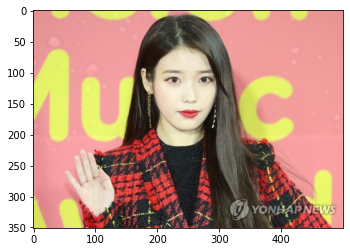

In [ ]:
!wget -O test.jpg https://img1.yna.co.kr/photo/yna/YH/2017/12/02/PYH2017120207500001300_P2.jpg
img = cv2.imread("./test.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
#plt.imshow(img)

In [ ]:
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

In [ ]:
cand_re = [i['rect'] for i in regions]

In [ ]:
print(cand_re) # 영역이 있을법한 모두 추출

[(0, 0, 250, 204), (218, 0, 281, 210), (216, 9, 128, 321), (145, 11, 92, 226), (307, 47, 124, 133), (200, 56, 90, 88), (0, 62, 57, 148), (0, 72, 167, 278), (198, 83, 95, 108), (166, 93, 109, 149), (330, 107, 89, 123), (79, 108, 80, 113), (213, 114, 129, 236), (318, 161, 163, 189), (134, 181, 148, 162), (374, 200, 125, 150), (56, 230, 74, 102), (109, 260, 126, 90), (134, 114, 208, 236), (134, 11, 208, 339), (166, 56, 124, 186), (166, 56, 127, 186), (307, 47, 124, 183), (0, 72, 167, 278), (0, 0, 250, 210), (109, 11, 233, 339), (216, 9, 265, 341), (0, 56, 293, 294), (307, 47, 192, 303), (109, 9, 372, 341), (0, 0, 250, 221), (0, 0, 293, 350), (218, 0, 281, 350), (0, 0, 499, 350), (0, 0, 499, 350)]


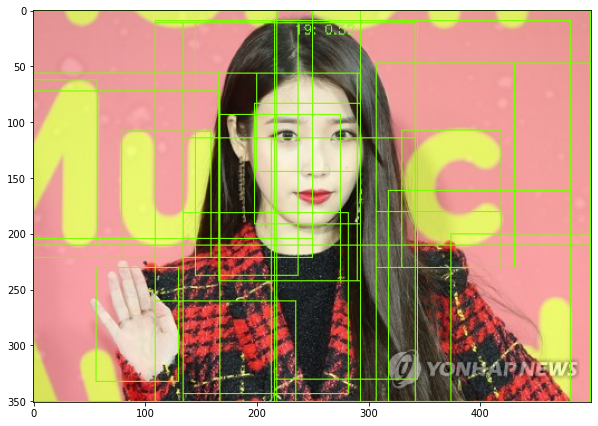

In [43]:
img_rgb_copy = img_rgb.copy()
green_rgb = (122, 255, 0)
for rect in cand_re:
    left = rect[0]
    top = rect[1]
    right = left + rect[2]
    bottom = top + rect[3]

    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb)

plt.figure(figsize= (10,10))
plt.imshow(img_rgb_copy)
plt.show()

In [ ]:
import numpy as np 

# IOU를 생성하는 함수
def compute_iou(cand_box, gt_box):

    # gt(정답), cand box(예측)의 교집합
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])
    
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)

    # gt(정답), cand box(예측)의 합집합
    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection
    
    # 나누기
    iou = intersection / union
    return iou

img shape: (351, 500, 3)
index: 19 iou: 0.5175353857784871 rectangle: (134, 11, 342, 350)


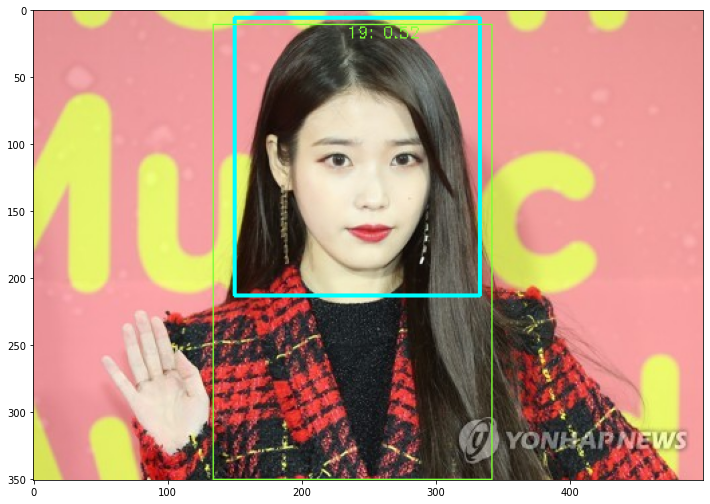

In [47]:
img = cv2.imread('./test.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

green_rgb = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 1000]
# size : 넓이
# gt_box = [400, 268, 644, 800] # 정답 box 크기
gt_box = [150, 6, 333, 213]

# Ground-Truth box
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=(0,255,255), thickness=2)


for index, cand_box in enumerate(cand_rects):
    
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    
    if iou > 0.5:
        print('index:', index, "iou:", iou, 'rectangle:',(cand_box[0], cand_box[1], cand_box[2], cand_box[3]) )
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=1)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)
    
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()

In [38]:
regions

[{'labels': [0.0], 'rect': (0, 0, 250, 204), 'size': 22651},
 {'labels': [1.0], 'rect': (218, 0, 281, 210), 'size': 29304},
 {'labels': [2.0], 'rect': (216, 9, 128, 321), 'size': 10019},
 {'labels': [3.0], 'rect': (145, 11, 92, 226), 'size': 8166},
 {'labels': [4.0], 'rect': (307, 47, 124, 133), 'size': 2794},
 {'labels': [5.0], 'rect': (200, 56, 90, 88), 'size': 3418},
 {'labels': [6.0], 'rect': (0, 62, 57, 148), 'size': 6003},
 {'labels': [7.0], 'rect': (0, 72, 167, 278), 'size': 17052},
 {'labels': [8.0], 'rect': (198, 83, 95, 108), 'size': 6757},
 {'labels': [9.0], 'rect': (166, 93, 109, 149), 'size': 4169},
 {'labels': [10.0], 'rect': (330, 107, 89, 123), 'size': 6243},
 {'labels': [11.0], 'rect': (79, 108, 80, 113), 'size': 4812},
 {'labels': [12.0], 'rect': (213, 114, 129, 236), 'size': 8401},
 {'labels': [13.0], 'rect': (318, 161, 163, 189), 'size': 13527},
 {'labels': [14.0], 'rect': (134, 181, 148, 162), 'size': 8464},
 {'labels': [15.0], 'rect': (374, 200, 125, 150), 'size':

In [41]:
cand_rects

[(0, 0, 250, 204),
 (218, 0, 281, 210),
 (216, 9, 128, 321),
 (145, 11, 92, 226),
 (307, 47, 124, 133),
 (200, 56, 90, 88),
 (0, 62, 57, 148),
 (0, 72, 167, 278),
 (198, 83, 95, 108),
 (166, 93, 109, 149),
 (330, 107, 89, 123),
 (79, 108, 80, 113),
 (213, 114, 129, 236),
 (318, 161, 163, 189),
 (134, 181, 148, 162),
 (374, 200, 125, 150),
 (56, 230, 74, 102),
 (109, 260, 126, 90),
 (134, 114, 208, 236),
 (134, 11, 208, 339),
 (166, 56, 124, 186),
 (166, 56, 127, 186),
 (307, 47, 124, 183),
 (0, 72, 167, 278),
 (0, 0, 250, 210),
 (109, 11, 233, 339),
 (216, 9, 265, 341),
 (0, 56, 293, 294),
 (307, 47, 192, 303),
 (109, 9, 372, 341),
 (0, 0, 250, 221),
 (0, 0, 293, 350),
 (218, 0, 281, 350),
 (0, 0, 499, 350),
 (0, 0, 499, 350)]